In [1]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
# from skimage import exposure
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [2]:
base_path = 'original_images/original_images'
import os
import pandas as pd
def get_img_names_classes(base_path):
    img_path = []
    img_class = []
    for folder in os.listdir(base_path):
        dirname = os.path.join(base_path, folder)
        img_dir = os.listdir(dirname)
        n = len(img_dir)
        
        img_path += [os.path.join(base_path, folder, img) for img in img_dir]
        img_class += [folder] * n
        
    return img_path, img_class

In [3]:
img_path, target = get_img_names_classes(base_path)
img_paths = pd.DataFrame({
    'img_path' : img_path,
    'target'   : target
})

img_paths.head()

,img_path,target
0,original_images/original_images\0\.ipynb_check...,0
1,original_images/original_images\0\o1.jpg,0
2,original_images/original_images\0\o10.jpg,0
3,original_images/original_images\0\o100.jpg,0
4,original_images/original_images\0\o1000.jpg,0


In [4]:
# img_paths.to_csv('img_paths.csv', index=False)

In [5]:
img_paths = pd.read_csv('img_paths.csv')
img_paths.head()

,img_path,target
0,original_images/original_images\0\o1.jpg,0
1,original_images/original_images\0\o10.jpg,0
2,original_images/original_images\0\o100.jpg,0
3,original_images/original_images\0\o1000.jpg,0
4,original_images/original_images\0\o1001.jpg,0


In [6]:
# add labels

labelTr = []
for label in img_paths['target']:
    labelTr.append(label)

In [7]:
len(labelTr)

250

In [8]:
labelTr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

In [9]:
# labelTr =  np.array(img_paths['target']).reshape(len(img_paths['target']),1)

In [10]:
labelTr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

In [11]:
import cv2
import numpy
import glob

read_images = []

for image in img_paths['img_path']:
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    image = cv2.resize(image, (180,180), interpolation = cv2.INTER_AREA)
    read_images.append(image)

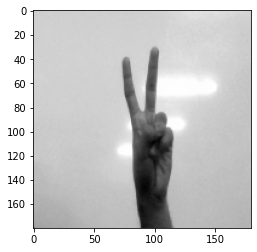

In [12]:
plt.imshow(read_images[50], 'gray')

In [13]:
hog_images = []
featureTr_hog = []

for image in read_images:
    fd,hog_image = hog(image, 
                       orientations=8,
                       cells_per_block=(2, 2),
                       pixels_per_cell=(8,8),
                       visualize=True)
    
    hog_images.append(hog_image)
    featureTr_hog.append(fd)

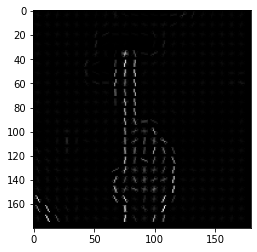

In [14]:
plt.imshow(hog_images[27], 'gray')

In [15]:
featureTr_hog

[array([0.0542767 , 0.03458049, 0.0466177 , ..., 0.04935183, 0.2410924 ,
        0.        ]),
 array([0.24997496, 0.        , 0.16187984, ..., 0.04767934, 0.25056787,
        0.08791636]),
 array([0.2491466 , 0.05150522, 0.24695375, ..., 0.09999891, 0.19583307,
        0.06676938]),
 array([0.26258528, 0.11526211, 0.13816275, ..., 0.11762972, 0.24814092,
        0.03327071]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.0044825 ,
        0.02309178]),
 array([0.25154439, 0.11970241, 0.24610776, ..., 0.22216303, 0.23567661,
        0.12767505]),
 array([0.25865636, 0.06851597, 0.14259124, ..., 0.06534408, 0.24341363,
        0.10176983]),
 array([0.25231653, 0.02731958, 0.15830969, ..., 0.19403303, 0.23834358,
        0.06372265]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.0580781 ,
        0.02143601]),
 array([0.17475181, 0.13025231, 0.19732066, ..., 0.08502529, 0.24988156,
        0.        ]),
 array([0.24524654, 0.06847012, 0.11782059, ..., 0

In [16]:
type(featureTr_hog)

list

In [17]:
len(labelTr)

250

In [18]:
len(featureTr_hog)

250

In [19]:
from sklearn.model_selection import train_test_split
#split the data into train and test set

train,test = train_test_split(img_paths, test_size=0.2, random_state=42)
#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [20]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [21]:
x_train , x_test , y_train , y_test = train_test_split(featureTr_hog ,
                                                       labelTr, 
                                                       test_size=0.2 , 
                                                       random_state=42)

In [31]:
x_train

[array([0.25751027, 0.11279715, 0.25751027, ..., 0.0746235 , 0.23738441,
        0.05842767]),
 array([0.25401815, 0.05340839, 0.20541133, ..., 0.        , 0.        ,
        0.        ]),
 array([0.2689365 , 0.16552782, 0.2689365 , ..., 0.13719015, 0.15710548,
        0.        ]),
 array([0.26518299, 0.09846478, 0.26518299, ..., 0.0724285 , 0.17043982,
        0.        ]),
 array([0.26590438, 0.05908221, 0.14467361, ..., 0.14747796, 0.24407925,
        0.10428266]),
 array([0.25405837, 0.14853018, 0.19092629, ..., 0.06662352, 0.2435778 ,
        0.        ]),
 array([0.19553813, 0.0484536 , 0.04566346, ..., 0.02219276, 0.10868607,
        0.0627706 ]),
 array([0.25471533, 0.05913819, 0.23831635, ..., 0.        , 0.13345704,
        0.05873074]),
 array([0.24651853, 0.17614338, 0.24539052, ..., 0.11961774, 0.2160488 ,
        0.20010953]),
 array([0.24387088, 0.05210556, 0.12290711, ..., 0.09474825, 0.24309177,
        0.14984721]),
 array([0.25423298, 0.12070365, 0.17682012, ..., 0

In [32]:
y_train

[5,
 9,
 9,
 4,
 5,
 2,
 8,
 6,
 6,
 9,
 9,
 6,
 4,
 3,
 5,
 6,
 9,
 4,
 6,
 9,
 2,
 6,
 4,
 3,
 9,
 3,
 1,
 5,
 3,
 3,
 0,
 2,
 7,
 9,
 6,
 2,
 5,
 4,
 8,
 5,
 1,
 0,
 1,
 1,
 1,
 8,
 0,
 3,
 8,
 4,
 2,
 3,
 5,
 7,
 3,
 1,
 4,
 6,
 3,
 5,
 1,
 9,
 6,
 9,
 5,
 0,
 0,
 3,
 1,
 4,
 5,
 6,
 9,
 3,
 3,
 7,
 7,
 3,
 1,
 2,
 6,
 5,
 0,
 9,
 7,
 1,
 6,
 0,
 4,
 1,
 5,
 7,
 5,
 2,
 5,
 5,
 9,
 8,
 2,
 7,
 2,
 1,
 6,
 1,
 4,
 6,
 0,
 8,
 7,
 3,
 1,
 8,
 1,
 3,
 7,
 6,
 1,
 5,
 7,
 0,
 4,
 2,
 5,
 9,
 7,
 9,
 1,
 6,
 3,
 1,
 8,
 0,
 6,
 4,
 3,
 3,
 8,
 9,
 3,
 0,
 0,
 2,
 8,
 5,
 0,
 6,
 2,
 8,
 5,
 8,
 9,
 2,
 2,
 4,
 2,
 9,
 6,
 8,
 7,
 9,
 8,
 8,
 6,
 2,
 1,
 3,
 0,
 2,
 8,
 6,
 9,
 7,
 7,
 5,
 1,
 6,
 9,
 0,
 2,
 5,
 5,
 6,
 4,
 3,
 4,
 3,
 8,
 2,
 8,
 8,
 4,
 9,
 0,
 7,
 2,
 4,
 0,
 3,
 7,
 4]

In [33]:
y_train

[5,
 9,
 9,
 4,
 5,
 2,
 8,
 6,
 6,
 9,
 9,
 6,
 4,
 3,
 5,
 6,
 9,
 4,
 6,
 9,
 2,
 6,
 4,
 3,
 9,
 3,
 1,
 5,
 3,
 3,
 0,
 2,
 7,
 9,
 6,
 2,
 5,
 4,
 8,
 5,
 1,
 0,
 1,
 1,
 1,
 8,
 0,
 3,
 8,
 4,
 2,
 3,
 5,
 7,
 3,
 1,
 4,
 6,
 3,
 5,
 1,
 9,
 6,
 9,
 5,
 0,
 0,
 3,
 1,
 4,
 5,
 6,
 9,
 3,
 3,
 7,
 7,
 3,
 1,
 2,
 6,
 5,
 0,
 9,
 7,
 1,
 6,
 0,
 4,
 1,
 5,
 7,
 5,
 2,
 5,
 5,
 9,
 8,
 2,
 7,
 2,
 1,
 6,
 1,
 4,
 6,
 0,
 8,
 7,
 3,
 1,
 8,
 1,
 3,
 7,
 6,
 1,
 5,
 7,
 0,
 4,
 2,
 5,
 9,
 7,
 9,
 1,
 6,
 3,
 1,
 8,
 0,
 6,
 4,
 3,
 3,
 8,
 9,
 3,
 0,
 0,
 2,
 8,
 5,
 0,
 6,
 2,
 8,
 5,
 8,
 9,
 2,
 2,
 4,
 2,
 9,
 6,
 8,
 7,
 9,
 8,
 8,
 6,
 2,
 1,
 3,
 0,
 2,
 8,
 6,
 9,
 7,
 7,
 5,
 1,
 6,
 9,
 0,
 2,
 5,
 5,
 6,
 4,
 3,
 4,
 3,
 8,
 2,
 8,
 8,
 4,
 9,
 0,
 7,
 2,
 4,
 0,
 3,
 7,
 4]

In [34]:
y_test

[5,
 0,
 3,
 2,
 4,
 7,
 7,
 7,
 0,
 4,
 8,
 8,
 9,
 9,
 2,
 8,
 7,
 0,
 7,
 0,
 9,
 0,
 4,
 2,
 7,
 1,
 2,
 0,
 1,
 4,
 8,
 1,
 5,
 8,
 1,
 4,
 0,
 7,
 7,
 6,
 4,
 3,
 4,
 7,
 8,
 0,
 5,
 2,
 6,
 1]

In [22]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

out = classifier.predict(x_test)

print("Accuracy: "+str(accuracy_score(y_test, out)))
print('\n')
print(classification_report(y_test, out))

Accuracy: 0.6


              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      1.00      0.91         5
           2       0.67      0.40      0.50         5
           3       0.67      1.00      0.80         2
           4       0.56      0.71      0.63         7
           5       0.50      0.67      0.57         3
           6       0.14      0.50      0.22         2
           7       0.75      0.33      0.46         9
           8       0.40      0.33      0.36         6
           9       1.00      0.33      0.50         3

    accuracy                           0.60        50
   macro avg       0.64      0.62      0.58        50
weighted avg       0.67      0.60      0.60        50



In [23]:
print("The predicted Data is :")
print(np.array(out))

The predicted Data is :
[6 0 3 6 4 6 7 6 0 4 7 8 8 9 6 2 4 0 7 0 4 5 4 6 8 1 2 0 1 3 0 1 5 4 1 4 0
 1 4 6 5 3 4 7 8 0 5 2 8 1]


In [24]:
print("The actual data is:")
print(np.array(y_test))

The actual data is:
[5 0 3 2 4 7 7 7 0 4 8 8 9 9 2 8 7 0 7 0 9 0 4 2 7 1 2 0 1 4 8 1 5 8 1 4 0
 7 7 6 4 3 4 7 8 0 5 2 6 1]


In [25]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':out})
df

,Actual,Predicted
0,5,6
1,0,0
2,3,3
3,2,6
4,4,4
5,7,6
6,7,7
7,7,6
8,0,0
9,4,4


In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,out)

array([[7, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 5, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 2, 0, 2, 3, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1]], dtype=int64)

In [27]:
def manual_testing(path):
    test_img = cv2.imread(path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
#     test_img = test_img[100:400, 300:600]
    test_img = cv2.resize(test_img, (180,180), interpolation = cv2.INTER_AREA)
    
    

    feature_hog, test_img = hog(test_img, 
                        orientations=8, 
                        pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), 
                        visualize=True)
    
    feature_hog = np.array(feature_hog).reshape(1,-1)

    plt.imshow(test_img, 'gray')

    pred_img = classifier.predict(feature_hog)
    return print('Answer is' , pred_img)

In [28]:
path = str(input())
manual_testing(path)

1


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
